In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('201A_experiment_data_final.csv')

In [4]:
df[[i for i in df.columns if i not in ['label_score', 'object_score']]]

,is_black_and_white,has_background,is_bright,has_sticker,has_tree,has_noise,max_score
0,1,0,1,1,0,1,0.893855
1,1,0,1,0,1,1,0.000000
2,1,1,1,1,0,1,0.841137
3,1,0,0,1,0,0,0.000000
4,1,0,0,0,0,1,0.916752
5,1,1,0,0,1,0,0.804531
6,0,0,0,0,1,0,0.830910
7,1,1,1,1,0,0,0.912275
8,0,1,1,1,0,1,0.000000
9,1,0,1,0,0,1,0.648970


In [3]:
df['binaryLabel'] = df.max_score.apply(lambda x: int(x > .5))

In [4]:
factors = df.columns[:6]

In [5]:
#for each main effect how big is the difference in accuracies between high and low levels?
for factor in factors:
    a0 = df[df[factor] == 0].binaryLabel.mean()
    a1 = df[df[factor] == 1].binaryLabel.mean()
    print 'Factor:', factor
    print 'Acc diff:', a0-a1
    print '---------'

Factor: is_black_and_white
Acc diff: -0.15625
---------
Factor: has_background
Acc diff: -0.15625
---------
Factor: is_bright
Acc diff: 0.34375
---------
Factor: has_sticker
Acc diff: 0.15625
---------
Factor: has_tree
Acc diff: 0.15625
---------
Factor: has_noise
Acc diff: -0.03125
---------


In [8]:
df[(df.is_black_and_white == 1)&(df.is_bright == 1)]

,is_black_and_white,has_background,is_bright,has_sticker,has_tree,has_noise,label_score,object_score,max_score,binaryLabel
0,1,0,1,1,0,1,0.0,0.893855,0.893855,1
1,1,0,1,0,1,1,0.0,0.000000,0.000000,0
2,1,1,1,1,0,1,0.0,0.841137,0.841137,1
7,1,1,1,1,0,0,0.0,0.912275,0.912275,1
9,1,0,1,0,0,1,0.0,0.648970,0.648970,1
12,1,0,1,1,1,1,0.0,0.807716,0.807716,1
17,1,0,1,1,1,0,0.0,0.000000,0.000000,0
19,1,0,1,0,1,0,0.0,0.000000,0.000000,0
20,1,1,1,0,1,1,0.0,0.650355,0.650355,1
25,1,0,1,1,0,0,0.0,0.000000,0.000000,0


In [9]:
not_bright = df[df.is_bright == 0]
is_bright = df[df.is_bright == 1]

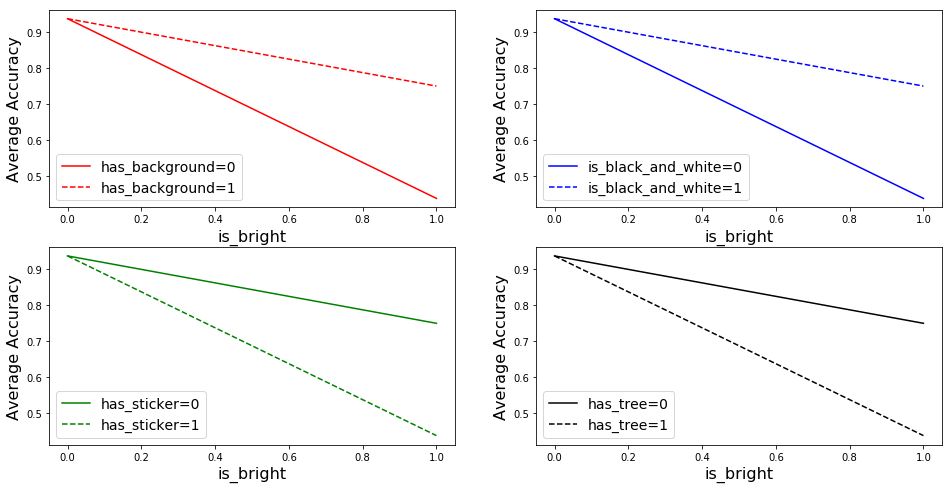

In [45]:
colors = ['red', 'blue', 'green', 'black']

plt.figure(figsize= (16,8))

for i, factor in enumerate(['has_background', 'is_black_and_white', 'has_sticker', 'has_tree']):
    
    plt.subplot(2,2,i+1)
    
    mu_zero = not_bright[not_bright[factor] == 0].binaryLabel.mean()
    mu_one = is_bright[is_bright[factor] == 0].binaryLabel.mean()
    plt.plot((0,1), (mu_zero, mu_one), color=colors[i])
    
    mu_zero = not_bright[not_bright[factor] == 1].binaryLabel.mean()
    mu_one = is_bright[is_bright[factor] == 1].binaryLabel.mean()
    plt.plot((0,1), (mu_zero, mu_one), color=colors[i], linestyle = '--')
    
    plt.legend([factor + '=0', factor + '=1'], fontsize=14, loc=3)
    plt.xlabel('is_bright', fontsize=16)
    plt.ylabel('Average Accuracy', fontsize=16)

In [46]:
no_sticker = df[df.has_sticker == 0]
has_sticker = df[df.has_sticker == 1]

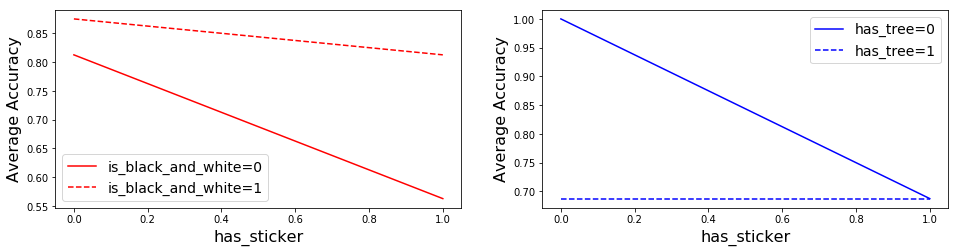

In [49]:
colors = ['red', 'blue']

plt.figure(figsize= (16,8))

for i, factor in enumerate(['is_black_and_white', 'has_tree']):
    
    plt.subplot(2,2,i+1)
    
    mu_zero = no_sticker[no_sticker[factor] == 0].binaryLabel.mean()
    mu_one = has_sticker[has_sticker[factor] == 0].binaryLabel.mean()
    plt.plot((0,1), (mu_zero, mu_one), color=colors[i])
    
    mu_zero = no_sticker[no_sticker[factor] == 1].binaryLabel.mean()
    mu_one = has_sticker[has_sticker[factor] == 1].binaryLabel.mean()
    plt.plot((0,1), (mu_zero, mu_one), color=colors[i], linestyle = '--')
    
    plt.legend([factor + '=0', factor + '=1'], fontsize=14)
    plt.xlabel('has_sticker', fontsize=16)
    plt.ylabel('Average Accuracy', fontsize=16)

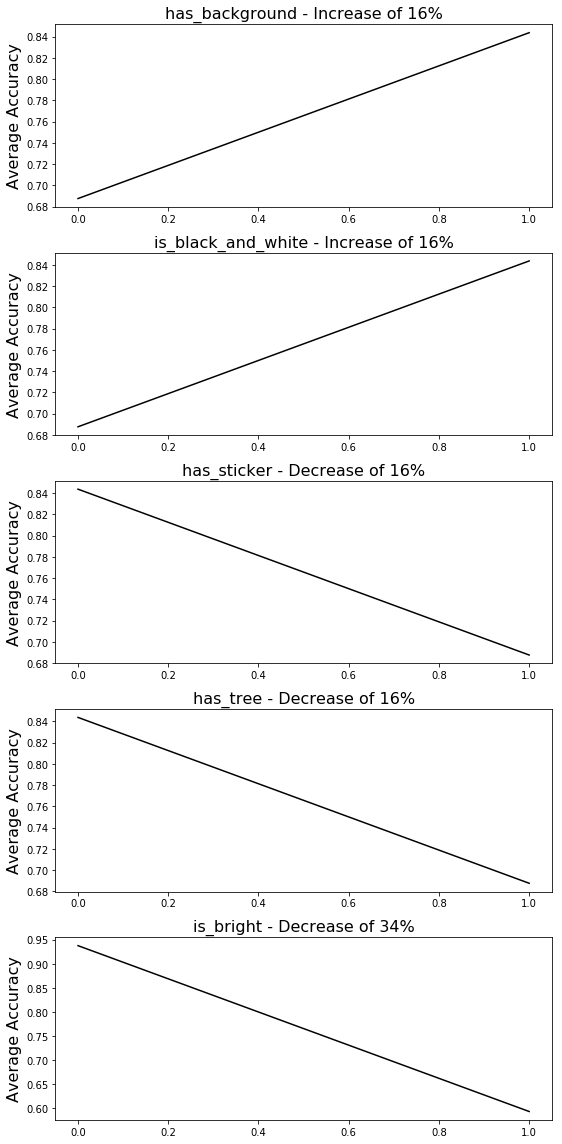

In [70]:
plt.figure(figsize= (8,16))

for i, factor in enumerate(['has_background', 'is_black_and_white', 'has_sticker', 'has_tree', 'is_bright']):
    
    plt.subplot(5,1,i+1)
    
    mu_zero = df[df[factor] == 0].binaryLabel.mean()
    mu_one = df[df[factor] == 1].binaryLabel.mean()
    
    diff = mu_one - mu_zero
    
    plt.plot((0,1), (mu_zero, mu_one), color='k')
    
    plt.ylabel('Average Accuracy', fontsize=16)
    
    plt.title(factor + (' - Increase' if diff > 0 else ' - Decrease') + ' of ' + str(int(round(abs(diff),2)*100)) + '%', fontsize=16)
    
plt.tight_layout()